In [1]:
from everything import *

In [2]:
query = """
SELECT ?work ?workLabel (min(?dates) as ?date) (sample(?pages_) as ?pages) (sample(?venue_labels) as ?venue) (group_concat(?author_label; separator=", ") as ?authors) WHERE {
  ?work wdt:P50 wd:Q20980928 .
  ?work wdt:P50 ?author .
  ?author rdfs:label ?author_label . filter (lang(?author_label) = 'en')
  
  optional { ?work wdt:P577 ?dates }
  optional { ?work wdt:P1104 ?pages_ }
  optional { ?work wdt:P1433 ?venues . ?venues rdfs:label ?venue_labels . filter (lang(?venue_labels) = 'en') }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }  
} group by ?work ?workLabel
order by desc(?date)
"""

In [3]:
service = sparql.Service('https://query.wikidata.org/sparql', method='GET')
response = service.query(query)
df = pd.DataFrame(response.fetchall(), columns=response.variables)

In [4]:
df.head()

,work,workLabel,date,pages,venue,authors
0,http://www.wikidata.org/entity/Q22329404,The Center for Integrated Molecular Brain Imag...,2016-01-01T00:00:00Z,7,NeuroImage,"Klaus Kähler Holst, David Erritzøe, Julian Mac..."
1,http://www.wikidata.org/entity/Q26236257,"Literature, Geolocation and Wikidata",2016-01-01T00:00:00Z,4,None,Finn Årup Nielsen
2,http://www.wikidata.org/entity/Q21172700,Collective remembering of organizations,2015-10-05T00:00:00Z,19,Corporate Communications,"Michael Andreas Etter, Finn Årup Nielsen"
3,http://www.wikidata.org/entity/Q26820221,Strategies of Legitimacy Through Social Media:...,2015-08-06T00:00:00Z,31,Journal of Management Studies,"Itziar Castelló, Michael Andreas Etter, Finn Å..."
4,http://www.wikidata.org/entity/Q22329083,"""The sum of all human knowledge"": A systematic...",2015-02-01T00:00:00Z,27,Journal of the Association for Information Sci...,"Arto Lanamäki, Mohamad Mehdi, Chitu Okoli, Mos..."


In [5]:
df.pages = [float(page.value) if page else np.nan for page in df.pages]

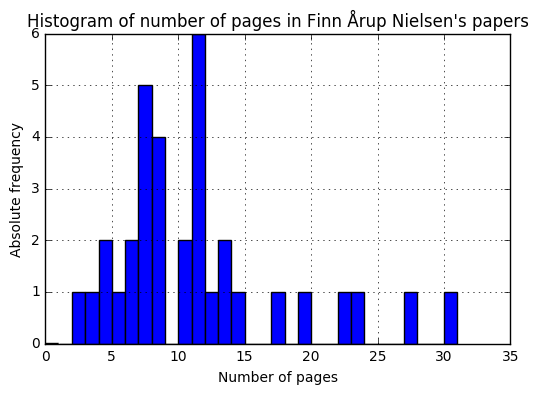

In [6]:
df.pages.hist(bins=range(int(max(df.pages))+1))
ylabel('Absolute frequency')
xlabel('Number of pages')
title(u"Histogram of number of pages in Finn Årup Nielsen's papers")
show()

In [7]:
df.year = [int(date.value[:4]) for date in df.date]

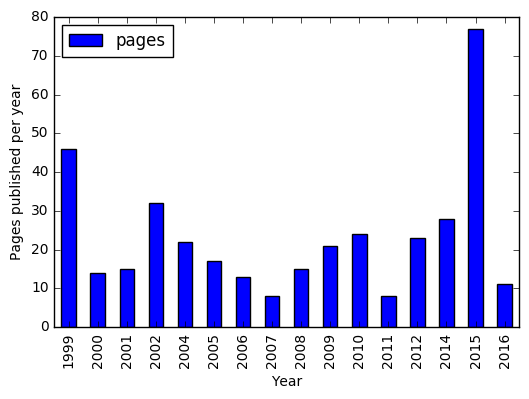

In [8]:
df.groupby(by=df.year).sum().plot(kind='bar')
xlabel('Year')
ylabel('Pages published per year')
show()